# Linear Regression

In [2]:
import torch
import torch.nn as nn 
import torch.optim as optim

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. 데이터 생성

In [168]:
x_data = torch.arange(1, 6)
y_data = x_data * 2

x = x_data.view(5, 1)
y = y_data.view(5, 1)
print("x :", x)
print("y :", y)

x : tensor([[1],
        [2],
        [3],
        [4],
        [5]])
y : tensor([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]])


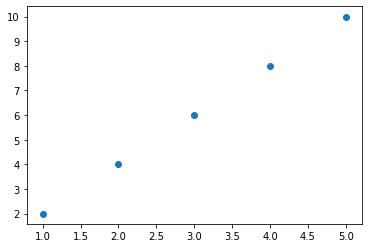

In [165]:
plt.scatter(x_data, y.data)
plt.show()

### Derive Normal Equation (부록)

In [166]:
xtx = torch.mm(x.t(),x)
xtx

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [167]:
xtx_inv = xtx.inverse()
xtx_inv_xt = torch.mm(xtx_inv, x.t())

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [44]:
w = torch.mm(xtx_inv_xt, y)
w.item()

1.9999998807907104

## 2-1. Grad와 모델정의, loss(cost) function

In [92]:
# 임의의 weight 선택
w = torch.rand(1,1) 
w.item()

0.6160815358161926

In [93]:
w*x

tensor([[0.6161],
        [1.2322],
        [1.8482],
        [2.4643],
        [3.0804]])

#### 기초 미분 공식

$\frac{d}{dx}f(x) = nx^{n-1}$  


$\frac{d}{dx}(f(x)+g(x)) = \frac{d}{dx}f(x) + \frac{d}{dx}g(x)$  


$\frac{d}{dx}(af(x)) = a\frac{d}{dx}f(x)$  


$\frac{d}{dx}a = 0$ ->상수미분  


$\frac{d}{dx}f(g(x)) = f’(g(x))g’(x)$   -> 체인 룰

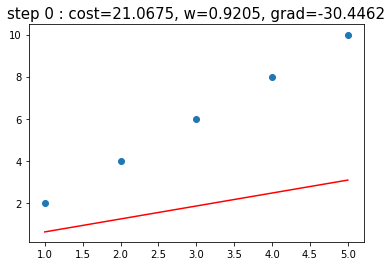

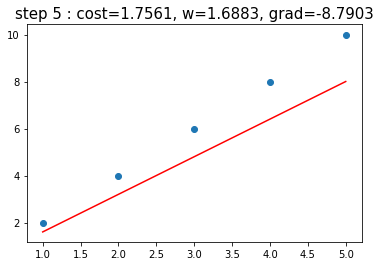

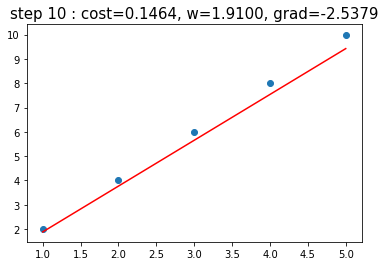

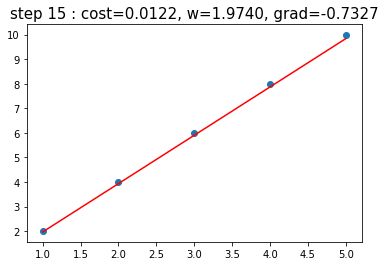

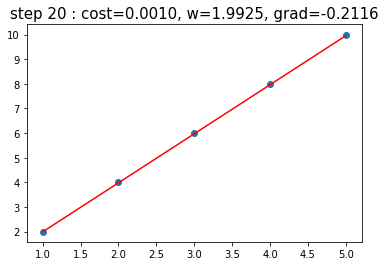

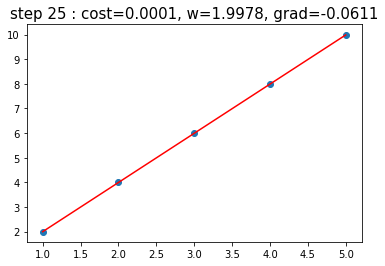

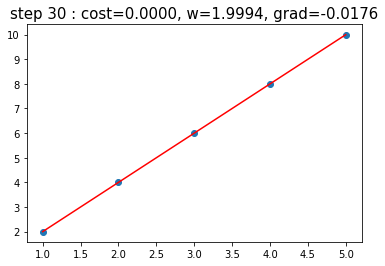

In [95]:
lr = 0.01 # 학습률

for step in range(35):
    pre = w*x # 답안
    
    # cost(mse) 계산
    cost = ((pre - y) ** 2).sum() / len(x) 
    
    
    # MSE 비용함수를 미분하여 도함수를 구하기
    #(wx-y)^2를 W에 대해 편미분 시 2(wx-y)*x
    grad = 2*(pre-y).view(5).dot(x.view(5))/len(x)
    w -= lr*grad
    
    if step % 5 == 0 :
        plt.scatter(x, y)
        plt.plot(x.data.numpy(), pre.data.numpy(), 'r-')
        # w.size() = 1*1, grad.size() = 1
        plt.title('step %d : cost=%.4f, w=%.4f, grad=%.4f' % (step, cost.item(), w.item(), grad.item()), fontdict={'size':15})
        plt.show()


In [206]:
# predict
x_new = torch.Tensor([6])
y_new = w*x_new
y_new.item()

11.998611450195312

## 2-2. nn.Linear와 Optimizer로 정의하기

In [211]:
x_data = torch.arange(1, 6, dtype=torch.float32)
y_data = x_data * 2

x = x_data.view(5, 1)
y = y_data.view(5, 1)
print("x :", x_data)
print("y :", y_data)

x : tensor([1., 2., 3., 4., 5.])
y : tensor([ 2.,  4.,  6.,  8., 10.])


In [215]:
model = nn.Linear(1, 1, bias = False)
model.weight

Parameter containing:
tensor([[-0.2448]], requires_grad=True)

In [216]:
loss = nn.MSELoss() ## MES Cost(Loss) Function

# model의 파라미터에는 requires_grad = true로 나옴
optimizer = optim.SGD(model.parameters(), lr=0.01) # model에 대해 optimizer 설정


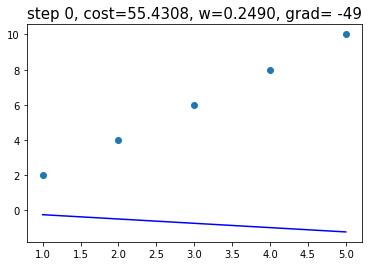

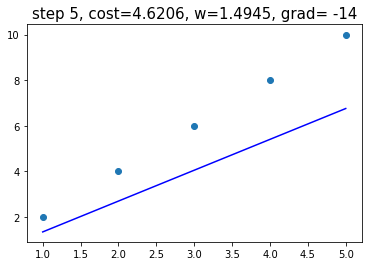

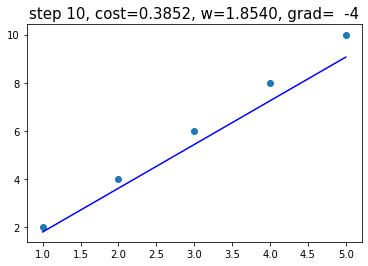

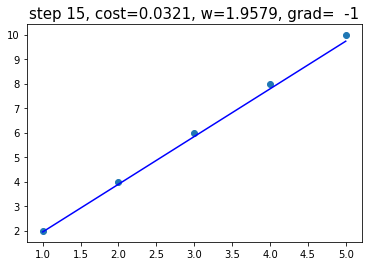

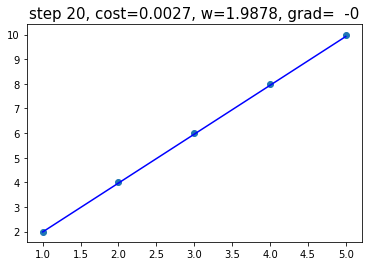

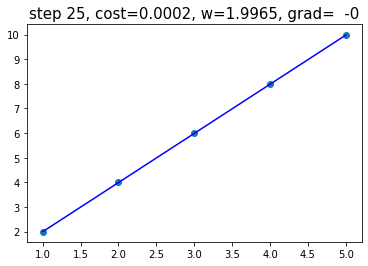

In [217]:
for step in range(30):
    pre = model(x)
    cost = loss(pre, y) # cost function
    
    optimizer.zero_grad()  # grad 초기화
    cost.backward()
    optimizer.step()
    
    
    if step % 5 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pre.data.numpy(), 'b-')
        plt.title('step %d, cost=%.4f, w=%.4f, grad=%4.f' 
                  % (step, cost.item() ,model.weight.item(), model.weight.grad.item()), fontdict={'size':15})
        plt.show()

In [219]:
# 모델로 예측하기
x_new = torch.Tensor([6])
y_new = model(x_new)
y_new.item()

11.99219799041748